# Self Driving Car Engineer Nanodegree
## Advanced Lane Finding | Camera Calibration
---
This project is divided into below mentioned steps. 

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

The project code is designed around two Jupyter notebook. In this notebook, code is written for
- **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
- **Apply a distortion correction to raw images & save the coefficients in a pickle file**

### Load & Display the images

In [1]:
# import necessary libraries
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the images
my_images = list(map(lambda fname: (fname, cv2.imread(fname)), glob.glob('./camera_cal/c*.jpg')))


In [10]:
# helper function to display the images
def display_images(img_list):
    
    img_count = len(img_list)
    cols = 4
    rows = 5
    figsize = (15,15)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    
    for ax, index in zip(axes.flat, indexes):
        if index < img_count:
            imgPathName, img = img_list[index]
            ax.imshow(img)
            ax.set_title(imgPathName)

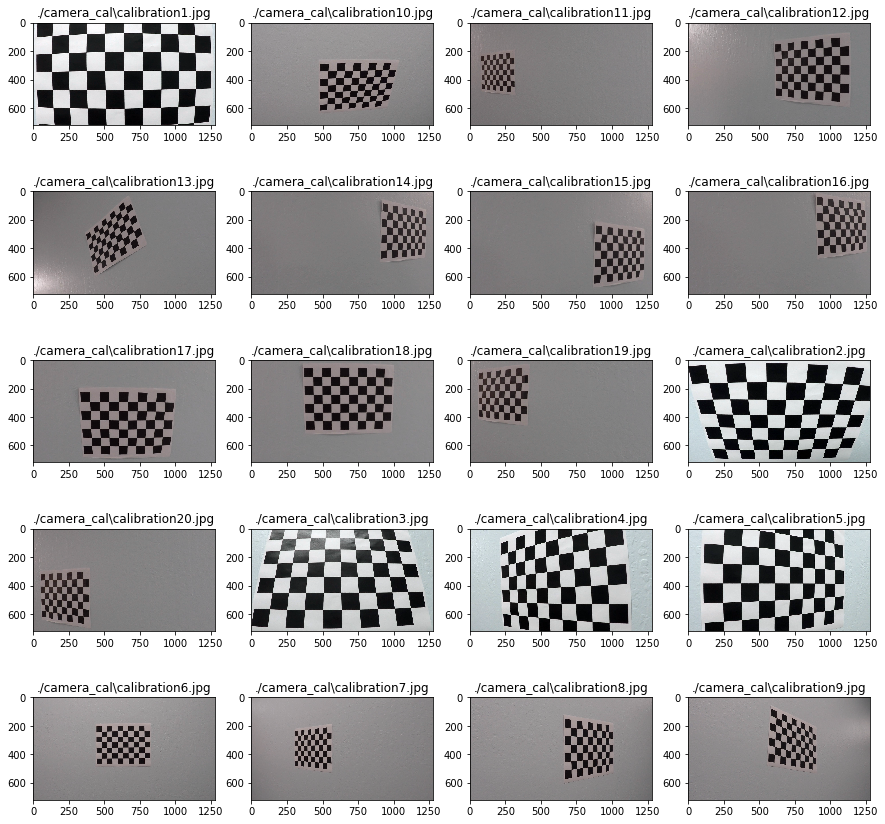

In [11]:
display_images(my_images)

### Find & Draw Chessboard Corners

In [12]:
objpoints = []
imgpoints = []
output_images = []
original_images = []

objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for img_file in my_images:
    fname, img = img_file
    # convert the image into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # FIND CHESSBOARD CORNERS
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # DRAW CHESSBOARD CORNERS
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        img_points = cv2.drawChessboardCorners(img.copy(), (9,6), corners, ret)
        output_images.append(img_points)
        original_images.append(img)

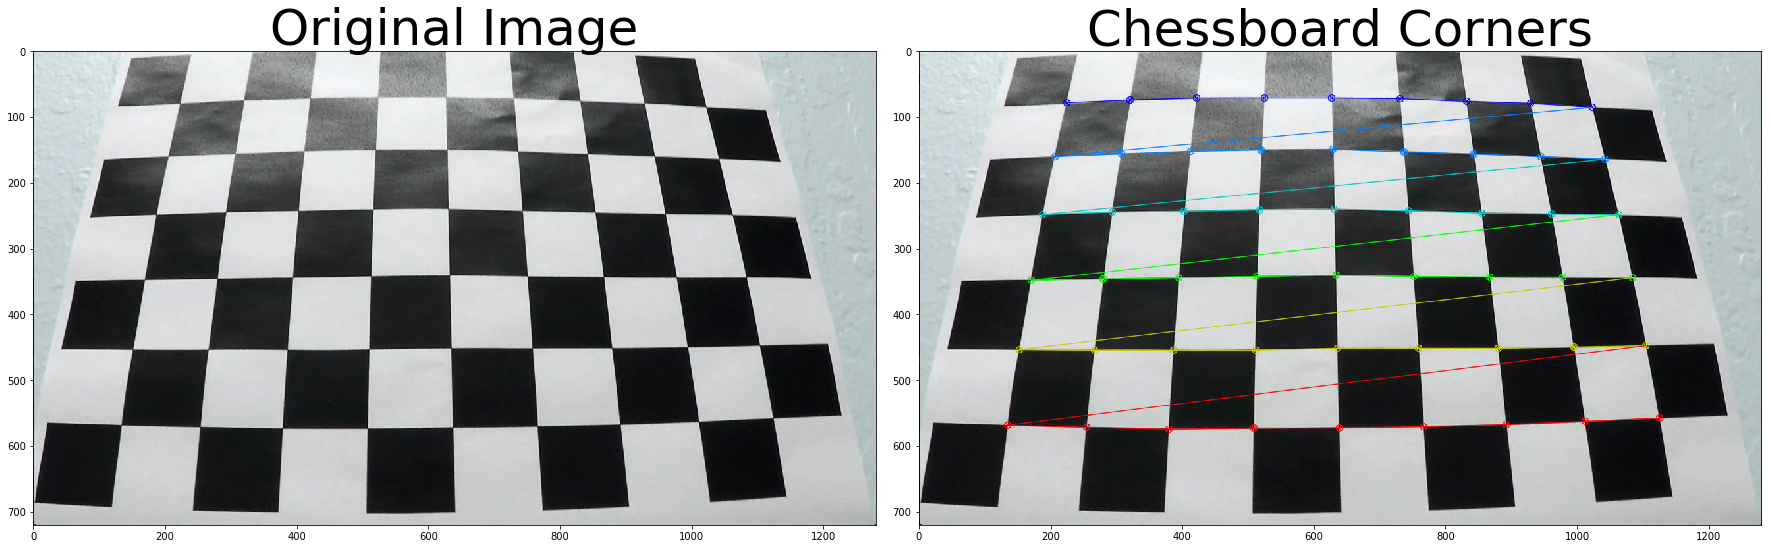

In [25]:
# Display the detected corners
original = original_images[12]
corners = output_images[12]

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (24,9))
fig.tight_layout()
ax1.imshow(original)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(corners)
ax2.set_title('Chessboard Corners', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [33]:
# Defining a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image

def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [36]:
# calling the function to undistort the original image
undistorted = cal_undistort(original, objpoints, imgpoints)

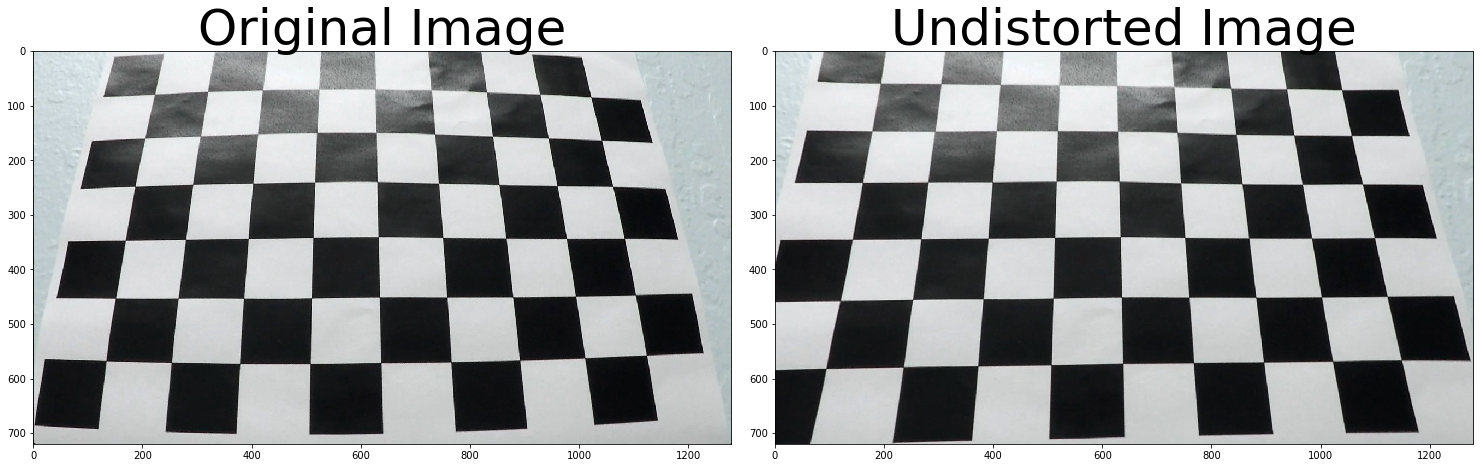

In [41]:
# Displaying the undistorted image
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
fig.tight_layout()
ax1.imshow(original)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [38]:
# saving the dist & mtx value of the calibrated image
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)
import pickle
pickle.dump({'mtx': mtx, 'dist': dist}, open('./my_pickle/camera_calibration.p', 'wb'))